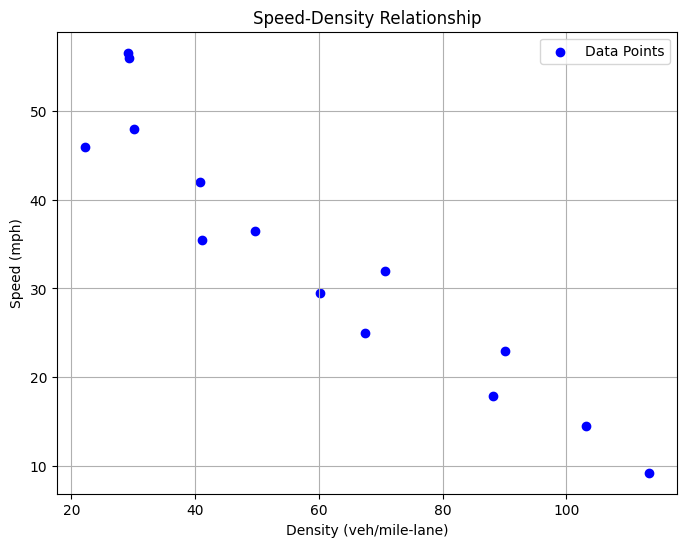

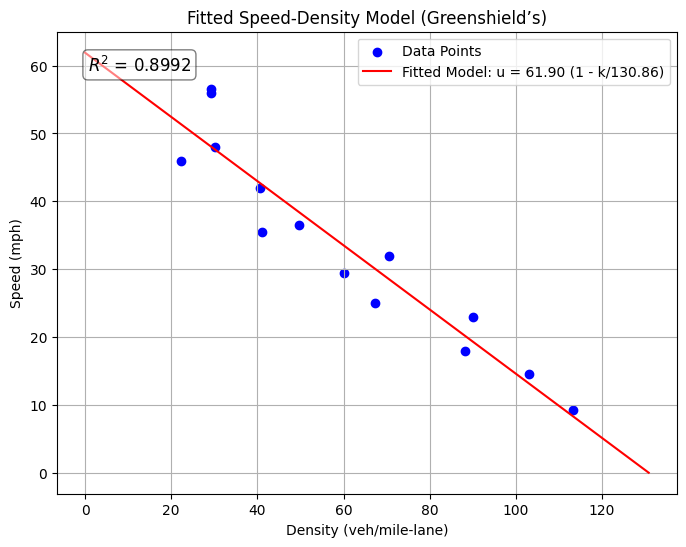

Free-Flow Speed (uf): 61.90 mph
Jam Density (kjam): 130.86 veh/mile-lane
R^2: 0.8992


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# Given speed-density data
data = {
    "Speed (mph)": [46.0, 56.0, 48.0, 42.0, 22.9, 56.6, 9.2, 17.9, 14.5, 29.5, 25.0, 32.0, 35.5, 36.5],
    "Density (veh/mile-lane)": [22.2, 29.3, 30.1, 40.7, 90.0, 29.2, 113.3, 88.2, 103.1, 60.2, 67.4, 70.6, 41.1, 49.6],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# (a) Plot the data (speed-density)
plt.figure(figsize=(8, 6))
plt.scatter(df["Density (veh/mile-lane)"], df["Speed (mph)"], color='blue', label='Data Points')
plt.xlabel("Density (veh/mile-lane)")
plt.ylabel("Speed (mph)")
plt.title("Speed-Density Relationship")
plt.legend()
plt.grid(True)
plt.show()

# (b) Fit a single-regime speed-density model
# Greenshield’s model: u = uf (1 - k/k_jam)

def greenshield_model(k, uf, kjam):
    return uf * (1 - k / kjam)

# Initial parameter guesses (free-flow speed and jam density)
uf_guess = max(df["Speed (mph)"])
kjam_guess = max(df["Density (veh/mile-lane)"])

# Curve fitting to estimate parameters
params, _ = opt.curve_fit(greenshield_model, df["Density (veh/mile-lane)"], df["Speed (mph)"], p0=[uf_guess, kjam_guess])

# Extract fitted parameters
uf_fit, kjam_fit = params

# Calculate predicted values and R^2 value
u_predicted = greenshield_model(df["Density (veh/mile-lane)"], uf_fit, kjam_fit)
ss_res = np.sum((df["Speed (mph)"] - u_predicted) ** 2)  # Sum of squares of residuals
ss_tot = np.sum((df["Speed (mph)"] - np.mean(df["Speed (mph)"])) ** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Generate fitted curve
k_values = np.linspace(0, kjam_fit, 100)
u_fitted = greenshield_model(k_values, uf_fit, kjam_fit)

# Plot fitted model
plt.figure(figsize=(8, 6))
plt.scatter(df["Density (veh/mile-lane)"], df["Speed (mph)"], color='blue', label='Data Points')
plt.plot(k_values, u_fitted, color='red', label=f'Fitted Model: u = {uf_fit:.2f} (1 - k/{kjam_fit:.2f})')
plt.text(0.05, 0.95, f"$R^2$ = {r_squared:.4f}", transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))
plt.xlabel("Density (veh/mile-lane)")
plt.ylabel("Speed (mph)")
plt.title("Fitted Speed-Density Model (Greenshield’s)")
plt.legend()
plt.grid(True)
plt.show()

# Print the estimated parameters and R^2 value
print(f"Free-Flow Speed (uf): {uf_fit:.2f} mph")
print(f"Jam Density (kjam): {kjam_fit:.2f} veh/mile-lane")
print(f"R^2: {r_squared:.4f}")